Populating the interactive namespace from numpy and matplotlib



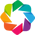

Loading BokehJS ...

In [1]:
%pylab inline
import pandas as pd
import holoviews as hv
import geoviews as gv
hv.extension('bokeh','matplotlib')
from bokeh.models import HoverTool, ColumnDataSource, ranges, LabelSet
import geopandas as gpd
pd.options.display.max_rows = 5000
from bokeh.plotting import figure, show
import json

from IPython.core.display import HTML

from bokeh.palettes import PuBu
from bokeh.io import show, output_notebook
output_notebook()

In [2]:
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
value="Click here to toggle on/off the raw code."></form>''')

In [3]:
bplaces=['Bălan', 'Baraolt', 'Miercurea Ciuc', 'Gheorgheni', 'Cristuru Secuiesc', 'Târgu Secuiesc',
       'Cluj-Napoca', 'Covasna', 'Praid', 'Reghin', 'Sighisoara', 'Sfântu Gheorghe',
       'Sovata', 'Toplița, Harghita', 'Odorheiu Secuiesc', 'Târgu Mureș', 'Vlahița']

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [5]:
def logarithm(data):
    return log(data)

In [6]:
data = data=pd.DataFrame.from_dict(json.loads(open("second.json").read()))

In [7]:
def change_name(place):
    if(place=="United States of America"):
        place="United States"
    if(place=="Czech Republic"):
        place="Czech Rep."
    if(place=="Hellas"):
        place="Greece"
    if(place=="The Netherlands"):
        place="Netherlands"
    if(place=="The United Arab Emirates"):
        place="United Arab Emirates"    
    if(place=="Burkina"):
        place="Burkina Faso"
    if(place=="Cyprus - Kıbrıs"):
        place="Cyprus"
    if(place=="Finnish"):
        place="Finland"
    if(place=="Svizra"):
        place="Switzerland"
    if(place=="Sri Lanka இலங்கை"):
        place="Sri Lanka"
    if(place=="UK"):
        place="United Kingdom"
    if(place=="ⵍⵣⵣⴰⵢⴻⵔ Algeria"):
        place="Algeria"
    if(place=="Tchad Chad"):
        place="Chad	"
    return place

In [8]:
data["NAME"]=data["NAME"].apply(change_name)

In [9]:
def Romania(place):
    %%output backend='bokeh'
    Romania=gv.Polygons(world[world["name"]=="Romania"]).options(cmap="magma_r",fill_alpha=0,toolbar='right')  
    return Romania
ro_dict = {name:Romania(name) for name in bplaces}
hmap_ro = hv.HoloMap(ro_dict, kdims='Birthplace')

In [10]:
people_born=data.groupby(by="birth").count()


In [11]:
def b_text(place):
    text="Out of "+str(people_born.loc[place]["id"])+" people"
    t=hv.Text(0, 500,text ,valign="top")  
    return t
t_dict = {name:b_text(name) for name in bplaces}
hmap_t = hv.HoloMap(t_dict, kdims='Birthplace')

In [12]:
def countries2(place):
    global string
    string="Out of "+str(people_born.loc[place]["id"])+" people born in"
    div=people_born.loc[place]["id"]
    third_map=data[data["birth"]==place].groupby("NAME",as_index=False).count()
    #third_map["id"]= third_map["id"]/div
    third_map["log_nr"]=logarithm(third_map["id"])

    datam=world.merge(third_map[["NAME","id","log_nr"]],how="inner",left_on="name",right_on="NAME")
    
    p=gv.Polygons(datam, vdims=["log_nr","id","name"]).options(
        width=600,height=500,show_frame=True,xaxis=None,yaxis=None,
        cmap="magma_r",fill_alpha=1,toolbar='right')#merging with polygon table

    hover = HoverTool(
            tooltips=[
                ("Number of people", "@id"),# @-al mukodik
                ("Location", "@name"),
            ])
    hover.point_policy="follow_mouse"
    
    TOOLS= [hover]
    return p.opts(plot=dict(tools=[hover]))
map_dict = {name:countries2(name) for name in bplaces}
hmap = hv.HoloMap(map_dict, kdims='Birthplace')

In [13]:
def test(place):
    %%opts Overlay [width=600 height=500] 
    newmap=data[data["birth"]==place][data["NAME"]=="Romania"].groupby(["livesin_located","livesin_p_lat","livesin_p_lon"],as_index=False).count()
    p=gv.Points(newmap[["livesin_located","livesin_p_lat","livesin_p_lon","id"]]
                     , kdims=['livesin_p_lon', 'livesin_p_lat'],vdims=['id','livesin_located']).options(
        hover_alpha=0.7,fill_alpha=0.5,line_alpha=0.7,line_color='black',
        color_index=2,size_index=2,scaling_factor=5,sizing_mode='fixed',
        width=500,height=500,show_frame=True, xaxis=None,yaxis=None,toolbar='right',
        cmap="magma_r")
    hover = HoverTool(
            tooltips=[
                ("Number of people", "@id"),# @-al mukodik
                ("Location","@livesin_located")
            ])
    hover.point_policy="follow_mouse"
    
    TOOLS= [hover]
    return p.opts(plot=dict(tools=[hover],norm=dict(framewise=True)))
test_dict = {s:test(s) for s in bplaces}
holomapt = hv.HoloMap(test_dict,kdims='Birthplace')

C:\Users\Edi\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Ebben az adatvizualizócióban megnézzük hogy hol élnek és hol tanultak az erdélyiek.

P. S. úgy tegyünk mintha a hibaüzenetek nem csonkítják az oldal szépségét.

Ezen a ploton látható hogy egyes városokban született emberek hol élnek. Olyan szokatlan országok jelennek meg ahova soha sem gondoltunk volna hogy erdélyi ember költozne, mint példáúl Thaiföld vagy az Egyesült Arab Emírségek. Ezek mellett sok olyat látunk ami nem lep meg; Európán belül az általános uticél Magyarország, Németország, Olaszország és az Egyesült Királyság, de sokan átrepülik az oceánot és USA-ban vay Kanadában élnek.

In [14]:
hmap * hmap_t

:HoloMap   [Birthplace]
   :Overlay
      .Polygons.I :Polygons   [Longitude,Latitude]   (log_nr,id,name)
      .Text.I     :Text   [x,y]

Románián belül azt lehet észre venni hogy a nagy városokban született emberek ott maradnak: pl. Kolozsvár és Marosvásárhely. A kisebb városok esetén kicsit szétszortabbak és különböző méretűek a pontok, nagyon sokan átköltöznek Kolozsvárba

In [27]:
holomapt * hmap_ro *hmap_t

C:\Users\Edi\Anaconda\lib\site-packages\bokeh\core\json_encoder.py:80: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(type(obj), np.float):


:HoloMap   [Birthplace]
   :Overlay
      .Points.I   :Points   [livesin_p_lon,livesin_p_lat]   (id,livesin_located)
      .Polygons.I :Polygons   [Longitude,Latitude]
      .Text.I     :Text   [x,y]

In [16]:
data2=pd.DataFrame.from_dict(json.loads(open("first.json").read()))

In [17]:
def remove_uni(name):
    for s in unis2:
        if(s in name):
            name=name.replace(s," ")
    return name

In [18]:
unis=['university','egyetem','universitatea','universitate','facultatea']
unis2=['university','egyetem','universitatea','universitate','facultatea']
isunis=[]
for name in data2['studwhere']:
    isuni=False
    for s in unis:
        if(isinstance(name, str) and s in name):
            isuni=True
            break
    isunis.append(isuni)
    

In [19]:
data2["is_uni"]=isunis
data_unis=data2[data2["is_uni"]==True]
data_unis["studwhere"]=data_unis["studwhere"].apply(remove_uni)

C:\Users\Edi\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
uni_names=[]
i=0
for s in data_unis["studwhere"]:
    #uni_names.append([])
    ok=False
    for words in ["babes","bolyai","babeș","ubb","iuliu hategan","iuliu hatiegan","iuliu hațieganu"]:
        if(words in s and ok==False):
            uni_names.append("Babeș-Bolyai")
            ok=True
    for words in ["northeastern illinois"]:
        if(words in s and ok==False):
            uni_names.append("Northeastern Illinois University")
            ok=True    
    for words in ["petru maior"]:
        if(words in s and ok==False):
            uni_names.append("Petru Maior")
            ok=True
    for words in ["sapientia"]:
        if(words in s and ok==False):
            uni_names.append("Sapientia")
            ok=True  
    for words in ["transilvania",'transylvania ']:
        if(words in s and ok==False):
            uni_names.append("Transilvania, Brasov")
            ok=True
    for words in ["eotvos","eötvös"]:
        if(words in s and ok==False):
            uni_names.append("ELTE")
            ok=True
    for words in ["corvinus"]:
        if(words in s and ok==False):
            uni_names.append("Corvinus Budapest")
            ok=True
    for words in ["szeged"]:
        if(words in s and ok==False):
            uni_names.append("Szegedi")
            ok=True
    #for words in ["umf"]:
    #    if(words in s and ok==False):
    #        uni_names.append("UMF")
            ok=True
    for words in ["semmelweis"]:
        if(words in s and ok==False):
            uni_names.append("SOTE")
            ok=True
    for words in ["alexandru ioan cuza","a i cuza"]:
        if(words in s and ok==False):
            uni_names.append("Alexandru Ioan Cuza Iasi")
            ok=True
    for words in ["partium"]:
        if(words in s and ok==False):
            uni_names.append("Partium")
            ok=True
    for words in ["din bucuresti","din bucurești"]:
        if(words in s and ok==False):
            uni_names.append("Din Bucuresti")
            ok=True
    for words in ["debrecen"]:
        if(words in s and ok==False):
            uni_names.append("Debrecen")
            ok=True
    for words in ["oradea"]:
        if(words in s and ok==False):
            uni_names.append("Oradea")
            ok=True
    for words in ["oxford"]:
        if(words in s and ok==False):
            uni_names.append("Oxford")
            ok=True
    ##############################################################################################################        
    for words1 in ["târgu","targu","tg","vasarhely","vásárhely","tirgu","tîrgu"]: 
        for words2 in ["mureș","mures","maros"]:
            for words3 in ["medicine","orvosi","medicina"]:
                if(words1 in s and words2 in s and words3 in s and ok==False):
                    uni_names.append("Medicina Targu Mures")
                    ok=True
            for words3 in ["dimitrie cantemir"]:
                 if(words1 in s and words2 in s and words3 in s and ok==False):
                    uni_names.append("Dimitrie Cantemir Targu-Mures")
                    ok=True
            for words3 in ["muveszeti","művészeti","arte","arts","arta","art"]:
                 if(words1 in s and words2 in s and words3 in s and ok==False):
                    uni_names.append("Arts Targu-Mures")
                    ok=True
    ##############################################################################################################                
    for words1 in ["cluj-napoca","cluj napoca","kolozsvár","kolozsvar"]:                 
        for words2 in ["dimitrie cantemir"]:
            if(words1 in s and words2 in s and ok==False):
                    uni_names.append("Dimitrie Cantemir Cluj-Napoca")
                    ok=True
        for words2 in ["technical","tehnică",'tehnica',"műszaki","muszaki","technology"]:
            if(words1 in s and words2 in s and ok==False):
                uni_names.append("Tehnical Cluj-Napoca")
                ok=True
        for words2 in ["muveszeti","művészeti","arte","arts","arta","art"]:
            if(words1 in s and words2 in s and ok==False):
                uni_names.append("Arts Cluj-Napoca")
                ok=True
        for words2 in ["arhitectura","architecture"]:
            if(words1 in s and words2 in s and ok==False):
                uni_names.append("Arhitectura Cluj-Napoca")
                ok=True  
        for words2 in ["usamv"]:
            if(words1 in s and words2 in s and ok==False):
                uni_names.append("USAMV Cluj-Napoca")
                ok=True
        #for words3 in ["medicine","orvosi","medicina"]:
        #        if(words1 in s and words2 in s and words3 in s and ok==False):
        #            uni_names.append("UMF")
        #            ok=True 
         
    ##############################################################################################################  
    for words1 in ["timisoara","timișoara"]: 
        for words2 in ["technical","tehnică",'tehnica',"műszaki","muszaki","technology"]:
            if(words1 in s and words2 in s and ok==False):
                uni_names.append("Tehnical Timisoara")
                ok=True
        for words2 in ["vest","west",'nyugati']:
            if(words1 in s and words2 in s and ok==False):
                uni_names.append("Vest Timisoara")
                ok=True
         
    ##############################################################################################################
    for words1 in ["sibiu"]:
        for words2 in ["blaga"]: 
            for words3 in ["lucian"]:
                if(words1 in s and words2 in s and words3 in s and ok==False):
                    uni_names.append("Lucian Blaga Sibiu")
                    ok=True
    ##############################################################################################################
    for words1 in ["brasov","brașov","brasso","brassó"]:
        for words2 in ["dimitrie cantemir"]:
            if(words1 in s and words2 in s and ok==False):
                uni_names.append("Dimitrie Cantemir Brasov")
                ok=True
        for words2 in ["spiru haret"]:      
            if(words1 in s and words2 in s and ok==False):
                uni_names.append("Spiru Haret Sibiu")
                ok=True
    ##############################################################################################################
    for words1 in ["bucuresti","bucurești"]:            
        for words2 in ["spiru haret"]:
            if(words1 in s and words2 in s and ok==False):
                uni_names.append("Spiru Haret Bucuresti")
                ok=True
        for words2 in ["usamv"]:
            if(words1 in s and words2 in s and ok==False):
                uni_names.append("USAMV Bucuresti")
                ok=True
        for words2 in ["hyperion"]:
            if(words1 in s and words2 in s and ok==False):
                uni_names.append("Hyperion Bucuresti")
                ok=True
        for words2 in ["politehnica"]:
            if(words1 in s and words2 in s and ok==False):
                uni_names.append("Politehnica Bucuresti")
                ok=True
        for words2 in ["ase"]:
            if(words1 in s and words2 in s and ok==False):
                uni_names.append("Ase Bucuresti")
                ok=True
       
         
    ##############################################################################################################
    for words1 in ["budapest"]: 
        for words2 in ["műszaki","muszaki","technology"]:
            if(words1 in s and words2 in s and ok==False):
                uni_names.append("BME")
                ok=True
    if(ok==False): uni_names.append("Other")
    #uni_names[i].append("None")

In [21]:
data_unis["uni_names"]=uni_names

C:\Users\Edi\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
data_unis_p=data_unis.groupby(by="uni_names",as_index=False).count().sort_values(by="id",ascending=False)

Itt láthatjuk hogy milyen egyetemekre járnak az erdélyiek. Nem meglepően a Babeș-Bolyaira mennek a legtöbben, de ugyanakkor sokan járnak Marosvásárhelyre vagy Brassóra egyetemre.

In [23]:
source = ColumnDataSource(dict(x=data_unis_p["uni_names"].tolist(),y=data_unis_p["id"].tolist()))

x_label = ""
y_label = ""
title = ""
plot = figure(plot_width=900, plot_height=500, tools="save",
        x_axis_label = None,
        y_axis_label = y_label,
        title=title,
        x_minor_ticks=2,
        x_range = source.data["x"],
        y_range= ranges.Range1d(start=0,end=5000))


labels = LabelSet(x='x', y='y', text='x', level='glyph',
        x_offset=-13.5, y_offset=0, source=source, render_mode='canvas',angle=70)

plot.vbar(source=source,x='x',top='y',bottom=0,width=0.3,color=PuBu[7][2])

plot.add_layout(labels)
show(plot)

In [24]:
works=data2.groupby(by="workwhat",as_index=False).count().sort_values(by="id",ascending=False)

In [25]:
works=works[works["id"]>30]

Itt láthatjuk hogy mik a legerterjetteb munkahelyek

In [26]:
source = ColumnDataSource(dict(x=works["workwhat"].tolist(),y=works["id"].tolist()))

x_label = ""
y_label = ""
title = ""
plot = figure(plot_width=900, plot_height=500, tools="save",
        x_axis_label = None,
        y_axis_label = y_label,
        title=title,
        x_minor_ticks=2,
        x_range = source.data["x"],
        y_range= ranges.Range1d(start=0,end=250))


labels = LabelSet(x='x', y='y', text='x', level='glyph',
        x_offset=-13.5, y_offset=0, source=source, render_mode='canvas',angle=70)

plot.vbar(source=source,x='x',top='y',bottom=0,width=0.3,color=PuBu[7][2])

plot.add_layout(labels)
show(plot)